# Análise Exploratória de Dados

<h2><a href="https://www.linkedin.com/in/fabio-henrique-rodrigues?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app " target="_blank">Fabio Henrique Rodrigues</a></h2>

Mais projetos pessoais <a href="https://sites.google.com/view/fabiohenriqueprojetos/in%C3%ADcio" target="_blank">Meu portifolio</a>

---

Análise exploratória de dados usando uma subamostra do dataset de um RH referente a vendas do varejista Walmart.

In [47]:
# Extração das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plot_labels import add_labels  # Importando a função da biblioteca


%matplotlib inline

## Aquisição do Dataframe

In [2]:
df = pd.read_csv('Walmart_sales.csv')

In [3]:
df_backup = df.copy()

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Analise Exploratoria

In [5]:
# detalhes do dataframe (Tipo de dados, qauntidade de registros)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Verificando se á dados faltantes (Vazios)
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Identificar valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#Verificar linhas duplicada
df.duplicated().sum()

0

In [9]:
# mostra o maximo de numeor de colunas
pd.options.display.max_columns = None

# mostra o maximo de numeor de linhas
pd.options.display.max_rows = None

In [10]:
#Tabela estatistica
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
# Identificar valores destindos de cada coluna
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [12]:
# Criando uma lista de nomes de coluna para alteração
nome_colunas = ['Num_loja', 'Data', 'Vendas_Semanal', 'Ausencia_Feriado', 'Temperatura',
       'Valor_Combustivel', 'IPC', 'Desemprego']

In [13]:
# substituindo o nome das colunas por meio da lista criada
df.columns = nome_colunas

In [14]:
df.head()

,Num_loja,Data,Vendas_Semanal,Ausencia_Feriado,Temperatura,Valor_Combustivel,IPC,Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
# Outro modo de substituição do nome das colunas por meio de chave e valor
df = df.rename(columns={'Num_loja' : 'Loja', 
                   'Data' : 'Data',
                   'Vendas_Semanal' : 'Vendas_semanais',
                   'Ausencia_Feriado' : 'Ausencia_feriado',
                   'Temperatura' : 'Temperatura',
                   'Valor_Combustivel' : 'Valor_combustivel',
                   'IPC' : 'ipc',
                   'Desemprego' : 'Indice_desemprego'})

In [16]:
df.head()

,Loja,Data,Vendas_semanais,Ausencia_feriado,Temperatura,Valor_combustivel,ipc,Indice_desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
# converter coluna data para o tipo date
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')

In [18]:
# covertendo o tipo da coluna para tipo categorico
df['Ausencia_feriado'] = pd.Categorical(df['Ausencia_feriado'])

## Analise Qualitativa

In [19]:
df_counts = df['Loja'].value_counts().sort_index().reset_index(name='Contagem').rename(columns={'index' : 'Loja'})
df_counts_percentil = round(df['Loja'].value_counts() / df.shape[0] * 100).reset_index(name='Percentual').rename(columns={'index' : 'Loja'})
resultado = pd.concat([df_counts, df_counts_percentil['Percentual']], axis=1)
resultado.head()

,Loja,Contagem,Percentual
0,1,143,2.0
1,2,143,2.0
2,3,143,2.0
3,4,143,2.0
4,5,143,2.0


In [20]:
df.head()

,Loja,Data,Vendas_semanais,Ausencia_feriado,Temperatura,Valor_combustivel,ipc,Indice_desemprego
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
faixas_temp = pd.cut(df['Temperatura'], bins=range(0, 110, 10))

# Contar as ocorrências em cada faixa
temp_faixa = faixas_temp.value_counts().reset_index(name='Contagem')
temp_faixa.columns = ['Faixa_Temp', 'Contagem']

# Calcular o percentual de ocorrências em cada faixa
temp_faixa_perc = round(faixas_temp.value_counts() / df.shape[0] * 100).reset_index(name='Percentil')
temp_faixa_perc.columns = ['Faixa_Temp', 'Percentil']

# Juntar as contagens e percentuais em um único DataFrame
resultado_temp = pd.concat([temp_faixa, temp_faixa_perc['Percentil']], axis=1)
resultado_temp

,Faixa_Temp,Contagem,Percentil
0,"(60, 70]",1226,19.0
1,"(70, 80]",1215,19.0
2,"(50, 60]",1082,17.0
3,"(80, 90]",876,14.0
4,"(40, 50]",866,13.0
5,"(30, 40]",576,9.0
6,"(20, 30]",327,5.0
7,"(90, 100]",179,3.0
8,"(10, 20]",80,1.0
9,"(0, 10]",5,0.0


In [22]:
Vendas_mensal = df.groupby(df['Data'].dt.to_period('M')).size().reset_index(name='Contegem_Vendas')
Vendas_mensal = Vendas_mensal.rename(columns={'Data' : 'Ano/mes'})
Vendas_mensal.head(10)

,Ano/mes,Contegem_Vendas
0,2010-02,180
1,2010-03,180
2,2010-04,225
3,2010-05,180
4,2010-06,180
5,2010-07,225
6,2010-08,180
7,2010-09,180
8,2010-10,225
9,2010-11,180


In [23]:
Vendas_mensal = df.groupby(df['Data'].dt.to_period('A')).size().reset_index(name='Contegem_Vendas')
Vendas_mensal = Vendas_mensal.rename(columns={'Data' : 'Ano/mes'})
Vendas_mensal.head(10)

C:\Users\fabio\AppData\Local\Temp\ipykernel_6740\792829207.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  Vendas_mensal = df.groupby(df['Data'].dt.to_period('A')).size().reset_index(name='Contegem_Vendas')


,Ano/mes,Contegem_Vendas
0,2010,2160
1,2011,2340
2,2012,1935


In [24]:
media_temperatura_mensal = df.groupby(df['Data'].dt.to_period('M'))['Temperatura'].mean().reset_index(name='Media_Temperatura')
media_temperatura_mensal.head(5)

,Data,Media_Temperatura
0,2010-02,36.288000
1,2010-03,47.194389
2,2010-04,56.901378
3,2010-05,65.364389
4,2010-06,75.076556


In [25]:
Media_valor_mensal = df.groupby(df['Data'].dt.to_period('M'))['Valor_combustivel'].mean().reset_index(name='Media Preço do Combustivel')
Media_valor_mensal

,Data,Media Preço do Combustivel
0,2010-02,2.691967
1,2010-03,2.786706
2,2010-04,2.868538
3,2010-05,2.917350
4,2010-06,2.788006
5,2010-07,2.773996
6,2010-08,2.783000
7,2010-09,2.734517
8,2010-10,2.807280
9,2010-11,2.886272


In [26]:
df.head()

,Loja,Data,Vendas_semanais,Ausencia_feriado,Temperatura,Valor_combustivel,ipc,Indice_desemprego
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## DataViz

### As vendas gerais mostram um padrão cíclico com picos periódicos.


<function matplotlib.pyplot.show(close=None, block=None)>

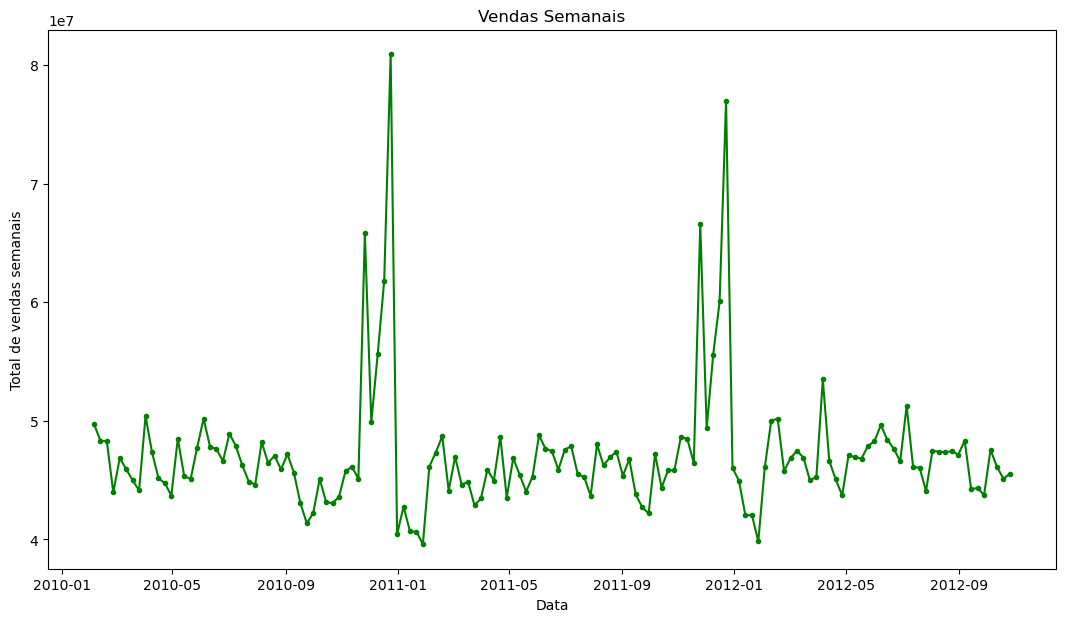

In [27]:
# Vendas Semanais durante os anos
plt.figure(figsize=(13,7))
plt.plot(df.groupby('Data')['Vendas_semanais'].sum(), color='green', marker='.') # Agrupando as datas e a soma de vendas semanais
plt.title('Vendas Semanais')
plt.xlabel('Data')
plt.ylabel('Total de vendas semanais')
plt.show

### O desempenho de vendas varia de acordo com a loja, com alguns superando consistentemente os outros.

C:\Users\fabio\AppData\Local\Temp\ipykernel_6740\374462662.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vendas_loja, x='Loja', y='Vendas_semanais', palette='viridis')


AttributeError: module 'matplotlib.pyplot' has no attribute 'Wedge'

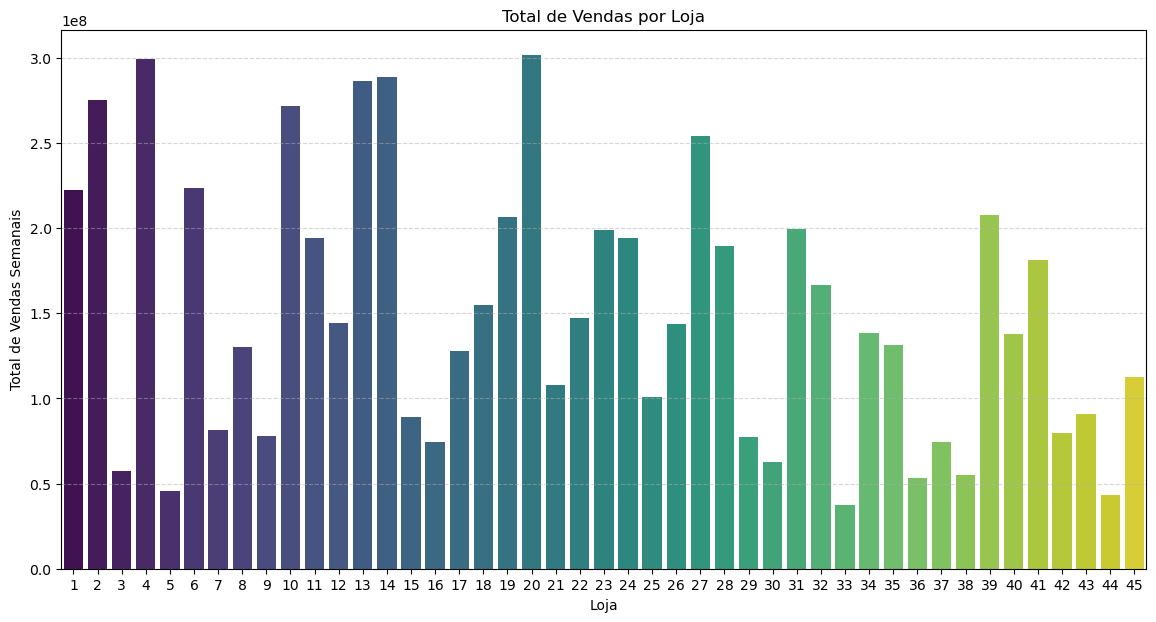

In [48]:
# Total de vendas por loja

# Agrupando por loja
Vendas_loja = df.groupby('Loja')['Vendas_semanais'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=Vendas_loja, x='Loja', y='Vendas_semanais', palette='viridis')
plt.title("Total de Vendas por Loja")
plt.xlabel("Loja")
plt.ylabel("Total de Vendas Semanais")
plt.grid(axis='y', linestyle="--", alpha=0.5)
add_labels(ax)
plt.show()

### As vendas atingem o pico durante os principais feriados e seguem um padrão sazonal previsível, com as vendas mais altas normalmente em dezembro.

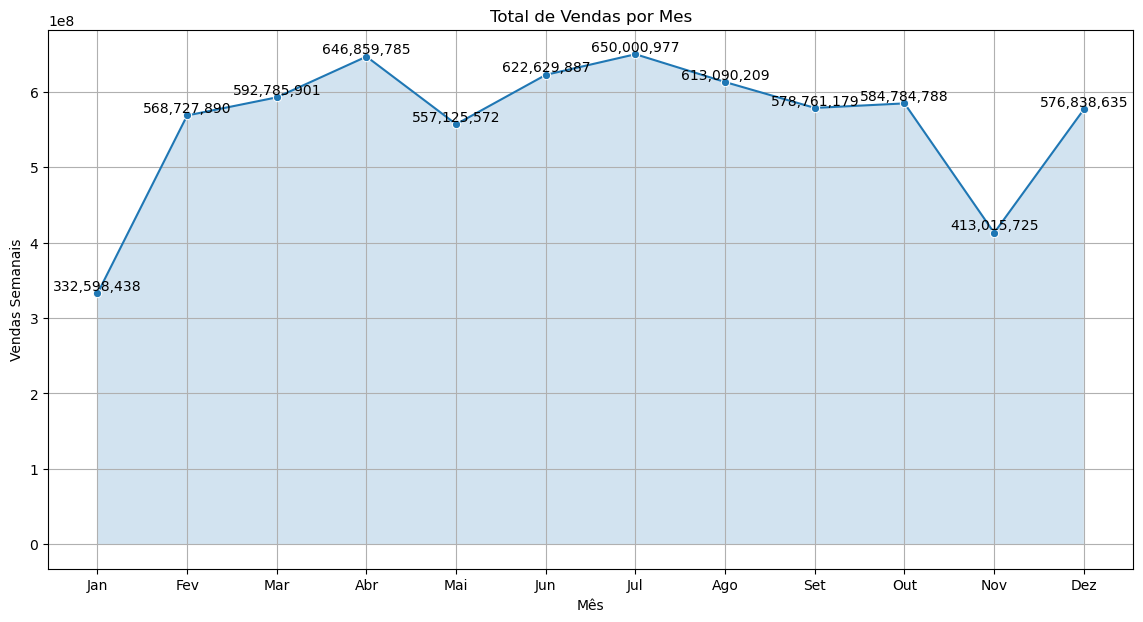

In [29]:
# Extrair o mês da data
df['Mes'] = df['Data'].dt.month
Vendas_mensais = df.groupby('Mes')['Vendas_semanais'].sum().reset_index()

#plot
plt.figure(figsize=(14,7))
sns.lineplot(data=Vendas_mensais,x='Mes',y='Vendas_semanais', marker='o')
plt.fill_between(Vendas_mensais['Mes'], Vendas_mensais['Vendas_semanais'], alpha=0.2)

# Rotulo de dados
for mes, vendas in Vendas_mensais.values:
    plt.text(mes, vendas,f'{vendas:,.0f}', ha = 'center', va = 'bottom')

# definindo o nome de cada mes
nome_mes = ['Jan', 'Fev', 'Mar', 'Abr','Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez',]
plt.xticks(ticks=range(1,13), labels=nome_mes)

plt.title('Total de Vendas por Mes')
plt.xlabel('Mês')
plt.ylabel('Vendas Semanais')
plt.grid(True)
plt.show()


### Como os feriados afetam as vendas semanais? Existe um aumento ou diminuição significativa? (Impacto do feriado)



C:\Users\fabio\AppData\Local\Temp\ipykernel_6740\1219518634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Vendas_feriado = df.groupby('Ausencia_feriado')['Vendas_semanais'].mean().reset_index()
C:\Users\fabio\AppData\Local\Temp\ipykernel_6740\1219518634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ausencia_feriado', y='Media_vendas_semanais', data=Vendas_feriado, palette='viridis')


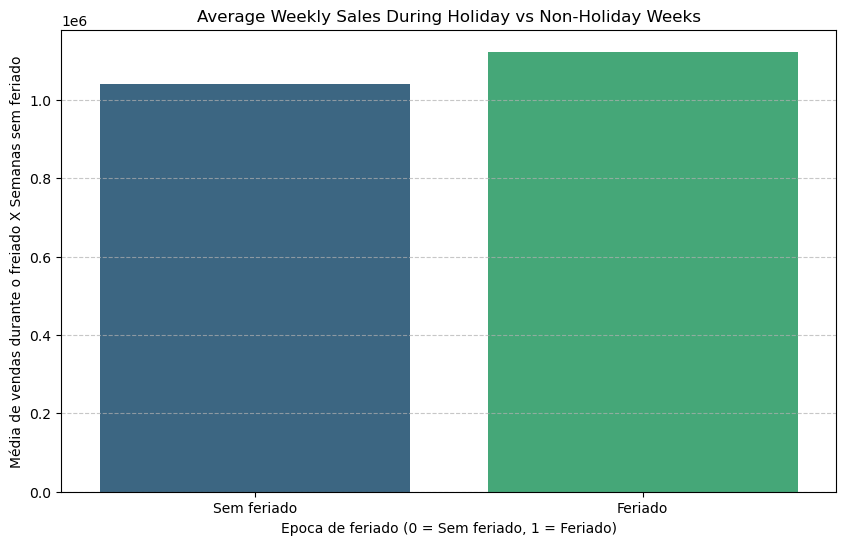

In [37]:
# group by holiday flag and calculate average weekly sales
Vendas_feriado = df.groupby('Ausencia_feriado')['Vendas_semanais'].mean().reset_index()
Vendas_feriado.columns = ['Ausencia_feriado', 'Media_vendas_semanais']

# plot
ax = plt.figure(figsize=(10, 6))
sns.barplot(x='Ausencia_feriado', y='Media_vendas_semanais', data=Vendas_feriado, palette='viridis')
plt.title('Average Weekly Sales During Holiday vs Non-Holiday Weeks')
plt.xlabel('Epoca de feriado (0 = Sem feriado, 1 = Feriado)')
plt.ylabel('Média de vendas durante o freiado X Semanas sem feriado')
plt.xticks([0, 1], ['Sem feriado', 'Feriado'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_labels(ax)
plt.show()
%matplotlib inline

### Os feriados geralmente levam a um aumento significativo nas vendas semanais, refletindo o aumento dos gastos do consumidor durante esses períodos. Essa percepção ajuda na preparação para picos de demanda de férias, otimizando os níveis de estoque e a equipe para maximizar a receita durante esses períodos-chave.

## Qual a relação entre a temperatura do ar e as vendas semanais

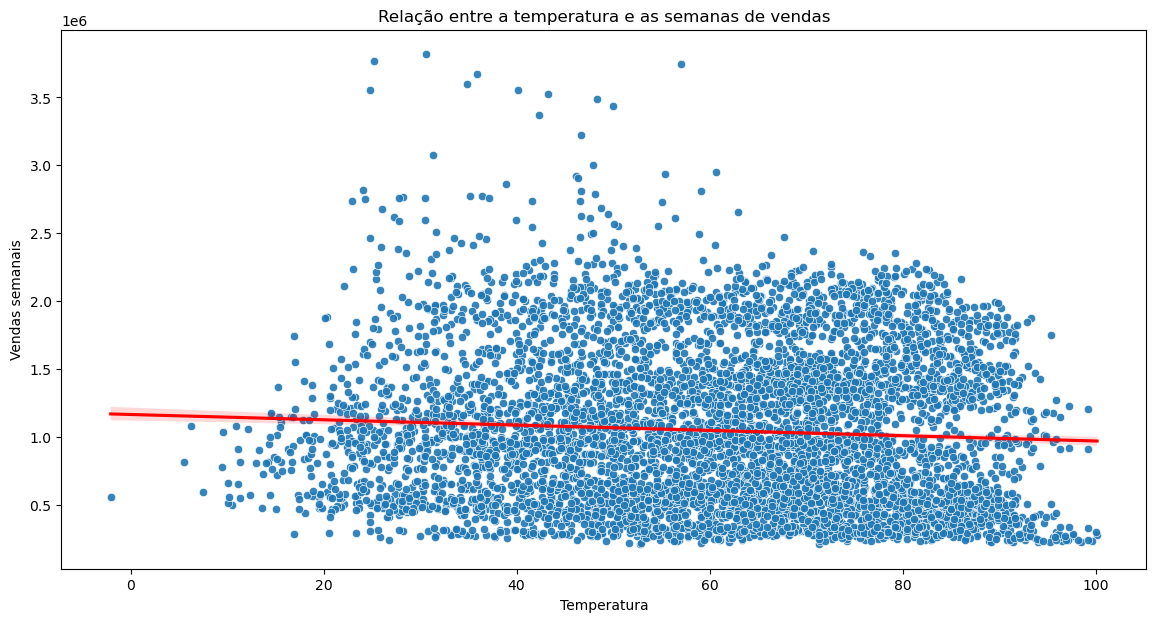

In [31]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Temperatura', y= 'Vendas_semanais', data=df, alpha=(0.9))
sns.regplot(data=df, x='Temperatura', y='Vendas_semanais', scatter=False, color='red')
plt.title('Relação entre a temperatura e as semanas de vendas')
plt.ylabel('Vendas semanais')
plt.show()

### A visualização ajuda a identificar se a temperatura do ar influencia significativamente as vendas semanais. Essa relação pode ser explorada usando testes estatísticos (por exemplo, correlação de Pearson) para confirmar a força e a direção da correlação. Compreender essa influência pode ajudar o Walmart a otimizar o estoque e as estratégias de marketing com base nos padrões climáticos.

## Como o combustivel impacta nas vendas semanais (fatores economicos)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


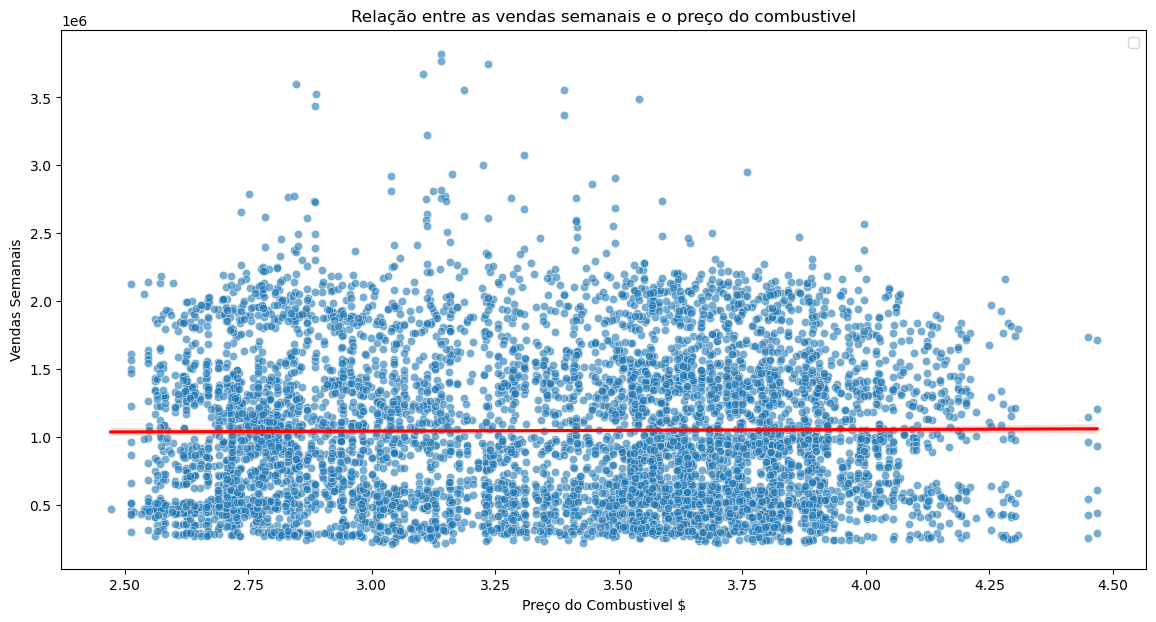

In [32]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Valor_combustivel', y='Vendas_semanais', data=df, alpha=0.6)
sns.regplot(x='Valor_combustivel', y='Vendas_semanais', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})
plt.title('Relação entre as vendas semanais e o preço do combustivel')
plt.xlabel('Preço do Combustivel $')
plt.ylabel('Vendas Semanais')
plt.legend()
plt.show()

#### A visualização ajuda a identificar se os preços dos combustíveis influenciam significativamente as vendas semanais. Essa relação pode ser explorada usando testes estatísticos (por exemplo, correlação de Pearson) para confirmar a força e a direção da correlação. Compreender essa influência pode ajudar o Walmart a otimizar suas estratégias de vendas e gerenciamento de estoque com base em condições econômicas, como flutuações nos preços dos combustíveis.

### Como a taxa de desemprego afeta os números de vendas? (Fatores econômicos)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


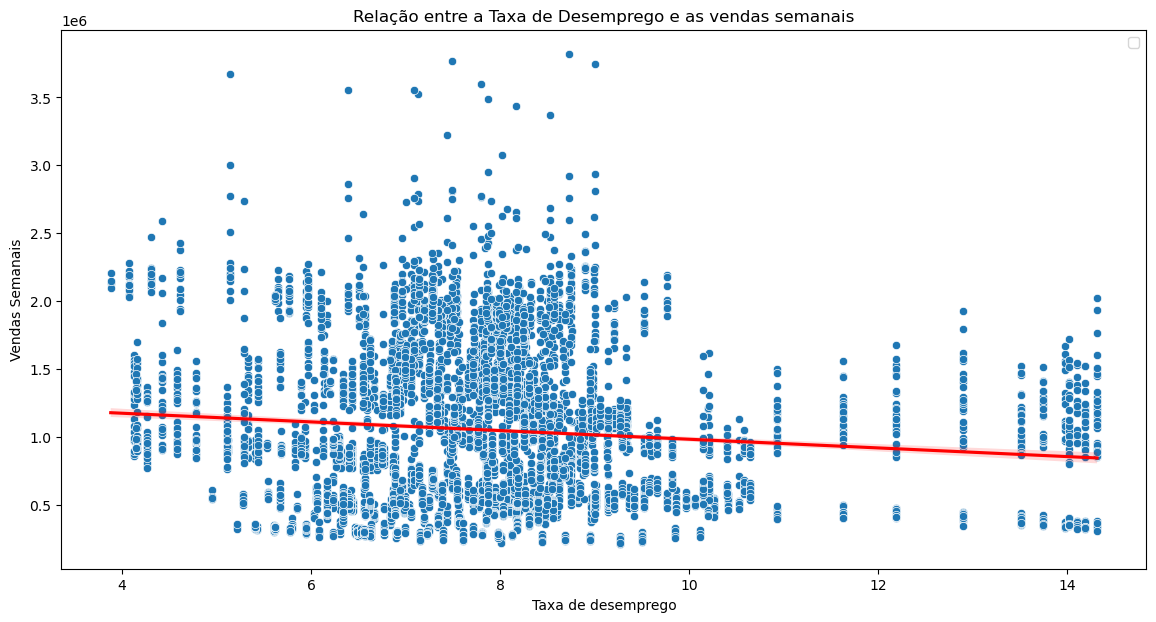

In [33]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Indice_desemprego', y='Vendas_semanais', data=df)
sns.regplot(x='Indice_desemprego', y='Vendas_semanais', data=df, scatter=False, color='red')
plt.title('Relação entre a Taxa de Desemprego e as vendas semanais')
plt.xlabel('Taxa de desemprego')
plt.ylabel('Vendas Semanais')
plt.legend()
plt.show()

#### A taxa de desemprego geralmente tem um impacto negativo nas vendas semanais, refletindo a redução dos gastos do consumidor durante os períodos de alto desemprego. Essa percepção ajuda a entender os fatores econômicos que influenciam as vendas e pode orientar estratégias para mitigar o impacto do aumento do desemprego nos números de vendas.



### Qual combinação de fatores (temperatura, preço do combustível, IPC, desemprego) influencia mais fortemente as vendas? (Influência Combinada de Fatores)

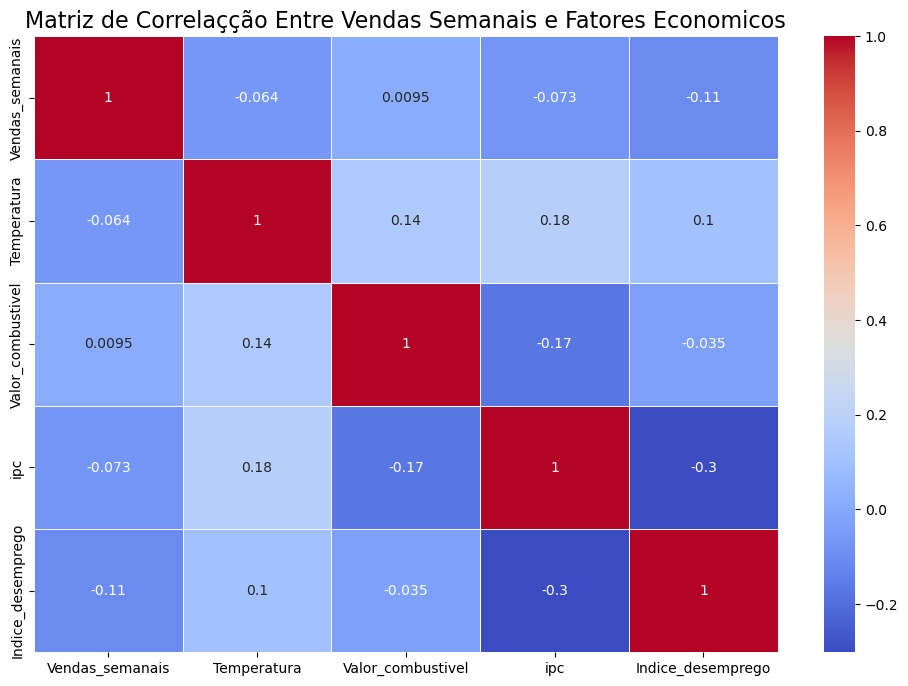

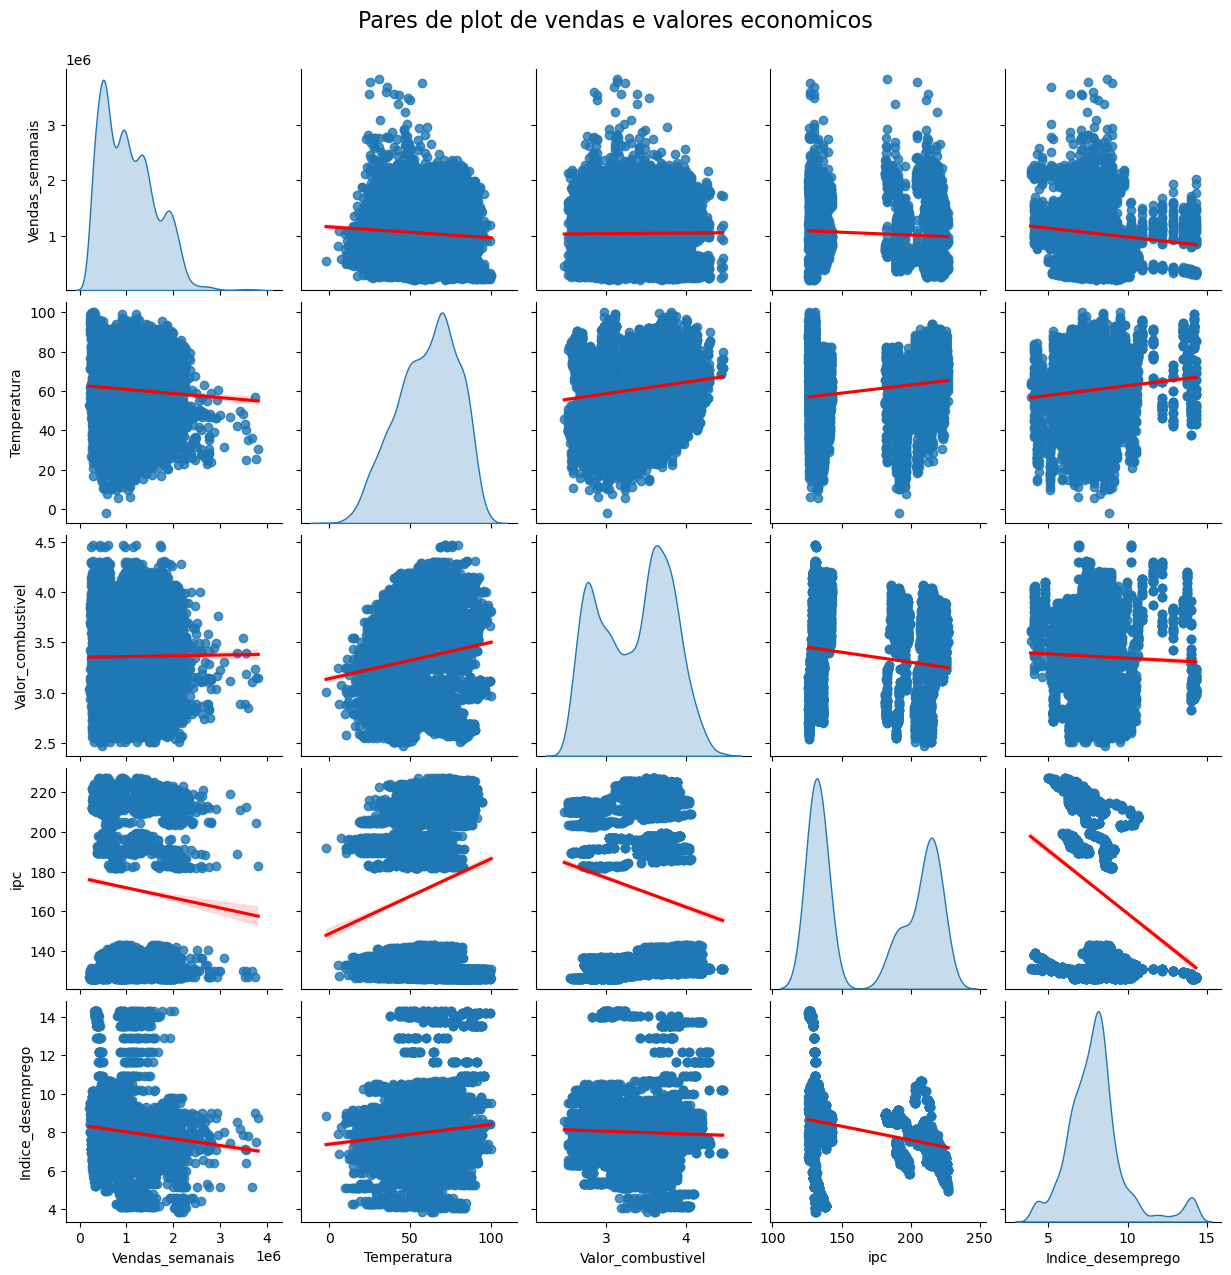

In [34]:
%matplotlib inline
# Calculo de matriz de correlação
matriz_correlacao = df[['Vendas_semanais','Temperatura', 'Valor_combustivel', 'ipc','Indice_desemprego']].corr()

# Plotar a matriz de correlação como a heatmap

plt.figure(figsize=(12,8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaçção Entre Vendas Semanais e Fatores Economicos', fontsize=16)
plt.show()

# Plotar um plot de graficos de corr para vizualizar as correlações

sns.pairplot(df[['Vendas_semanais', 'Temperatura', 'Valor_combustivel', 'ipc', 'Indice_desemprego']],
             diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pares de plot de vendas e valores economicos', fontsize=16, y=1.02)
plt.show()


#### Depois de visualizar os dados por meio de uma matriz de correlação e gráfico de pares, fica evidente que o Índice de Preços ao Consumidor (IPC) e a taxa de desemprego influenciam mais fortemente as vendas semanais. A matriz de correlação mostra uma relação significativa entre esses fatores e as vendas semanais, enquanto o gráfico de pares destaca tendências claras em como o IPC e o desemprego afetam os números de vendas. A temperatura e o preço do combustível também afetam as vendas, mas em menor grau em comparação com o IPC e o desemprego.

### Conclusão
#### A análise de dados revela vários insights importantes sobre os fatores que influenciam as vendas semanais do Walmart. Os fatores mais significativos são o Índice de Preços ao Consumidor (IPC) e a taxa de desemprego, com IPC mais alto correlacionado com aumento de vendas e maior desemprego correlacionado com queda de vendas. A temperatura e o preço do combustível também afetam as vendas, embora seus efeitos sejam mais dependentes do contexto e interajam com o IPC e o desemprego para amplificar ou mitigar sua influência nas vendas
